# **Loading Necessary Libraries**

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', 200)

# **Loading Datasets using pandas**

In [296]:
price_data = pd.read_csv('price_data.csv')
client_data = pd.read_csv('client_data.csv')

# **Shape of the Dataset**

In [297]:
print('Client Data Shapa :', client_data.shape)
print('price Data Shape :', price_data.shape)

Client Data Shapa : (14606, 26)
price Data Shape : (193002, 8)


# **Dataset**

In [298]:
client_data.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [299]:
price_data.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


# **Data Features**

In [300]:
print(client_data.columns)
print('\n-------------\n')
print(price_data.columns)

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

-------------

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')


# **Column Type**

In [301]:
print(client_data.dtypes)
print('\n-------------\n')
print(price_data.dtypes)

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

# **Data Cleaning and Preparation For Client Data**

In [302]:
import pandas as pd

for f in ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']:
    client_data[f] = pd.to_datetime(client_data[f], errors='coerce')

client_data['contract_start_year'] = client_data['date_activ'].dt.year
client_data['contract_end_year'] = client_data['date_end'].dt.year


# **Data Cleaning and Preparation For Price Data**

In [303]:
price_data['price_date'] = pd.to_datetime(price_data['price_date'])


# **Descriptive Statistical Analysis of Both Client and Price Data**


In [304]:
print(client_data.describe())
print('\n-------------\n')
print(price_data.describe())

           cons_12m  cons_gas_12m  cons_last_month  \
count  1.460600e+04  1.460600e+04     14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752   
min    0.000000e+00  0.000000e+00         0.000000   
25%    5.674750e+03  0.000000e+00         0.000000   
50%    1.411550e+04  0.000000e+00       792.500000   
75%    4.076375e+04  0.000000e+00      3383.000000   
max    6.207104e+06  4.154590e+06    771203.000000   
std    5.734653e+05  1.629731e+05     64364.196422   

                          date_activ                       date_end  \
count                          14606                          14606   
mean   2011-01-28 07:54:18.879912448  2016-07-27 20:48:26.422018560   
min              2003-05-09 00:00:00            2016-01-28 00:00:00   
25%              2010-01-15 00:00:00            2016-04-27 06:00:00   
50%              2011-03-04 00:00:00            2016-08-01 00:00:00   
75%              2012-04-19 00:00:00            2016-10-31 00:00:00   
max             

In [305]:
print(client_data.info())
print('\n-------------\n')
print(price_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

# **Checking Missing Values and Duplicated Rows of Both Client and Price Data**

In [306]:
def missingvalues_and_duplicates(dataset, dataset_name):
    missing = dataset.isnull().sum()
    missing_values = missing.sum()
    
    if missing_values > 0:
        print(f'There is a missing values total {missing_values}' )
    else:
        print('there is no missing values')
        
    duplicates = dataset.duplicated().sum()
    duplicate_values = duplicates.sum()
    
    if duplicate_values > 0:
        print(f'there is a duplicated rows total {duplicate_value}')
    else:
        print('There is No duplicated rows')

In [307]:
print('Client Dataset')
missingvalues_and_duplicates(dataset=client_data, dataset_name='Client Dataset')
print('\n--------\n')
print('Price Dataset')
missingvalues_and_duplicates(dataset=price_data, dataset_name='Price Dataset')

Client Dataset
there is no missing values
There is No duplicated rows

--------

Price Dataset
there is no missing values
There is No duplicated rows


# **Checking Categorical Values in Client and Price Data**

In [308]:
def categorical_columns(dataset):
    cat_cols = dataset.select_dtypes(include='object').columns
    
    if len(cat_cols) == 0:
        print('There are no Categorical Columns')
    else:
        print(f'Categorical Columns: {cat_cols}')
        print('\n------\n')
        for cat in cat_cols:
            count_proportion = dataset[cat].value_counts(normalize=True).to_frame('proportion')
            count_proportion['count'] = dataset[cat].value_counts()
            print(count_proportion, '\n' + '-'*40)


In [309]:
print('Client Dataset')
categorical_columns(dataset=client_data)
print('\n============================\n')
print('Price Dataset')
categorical_columns(dataset=price_data)

Client Dataset
Categorical Columns: Index(['id', 'channel_sales', 'has_gas', 'origin_up'], dtype='object')

------

                                  proportion  count
id                                                 
24011ae4ebbe3035111d65fa7c15bc57    0.000068      1
2fae70276cd7a4874a2aefcd68d5a184    0.000068      1
a7a9dac0ffc2ad56c66a1b08d53d0e51    0.000068      1
6cfbce2099a4163ea4fe422fb28829ea    0.000068      1
4289e929ecd35a0754e697feb24a091b    0.000068      1
...                                      ...    ...
0b69432a3ceee7763bf86ffe30c6bc2d    0.000068      1
6cabca88c760284183f51f84e4a27b1e    0.000068      1
de92494d7140dc94be6a1ebafaf98056    0.000068      1
a8e828bfad0869527e9acdd39a36cc91    0.000068      1
563dde550fd624d7352f3de77c0cdfcd    0.000068      1

[14606 rows x 2 columns] 
----------------------------------------
                                  proportion  count
channel_sales                                      
foosdfpfkusacimwkcsosbicdxkicaua    

# **Label Encoding for categorical columns**

In [310]:
def label_encoder(dataset, columns):
    for column in columns:
        lb = LabelEncoder()
        dataset[column] = lb.fit_transform(dataset[column])
        
        return dataset

In [311]:
columns_to_encode = ['channel_sales', 'origin_up']
client_data = label_encoder(client_data, columns_to_encode)


# **Checking Numerical values in Client and Price Data**

In [312]:
import pandas as pd

def describe_numeric(dataset):

    int_columns = dataset.select_dtypes(include=['int']).columns.tolist()
    float_columns = dataset.select_dtypes(include=['float']).columns.tolist()

    if len(int_columns) + len(float_columns) == 0:
        print('There are no numeric variables in the dataset')
        return

    print('Numeric variables are:', int_columns + float_columns)
    print('==' * 40)

    if int_columns:
        print('Discrete Numeric Variables:')
        for col in int_columns:
            print(f'Distribution of {col}:')
            value_counts = dataset[col].value_counts()
            proportions = value_counts / len(dataset)
            describe_frame = pd.DataFrame({'count': value_counts, 'proportion': proportions})
            print(describe_frame)
            print('--' * 40)

    if float_columns:
        print('Continuous Numeric Variables:')
        summary_stats = dataset[float_columns].describe(include='all')
        print(summary_stats)
        print('--' * 40)



In [313]:
print('Client Dataset')
describe_numeric(dataset=client_data)
print('\n============================\n')
print('Price Dataset')
describe_numeric(dataset=price_data)

Client Dataset
Numeric variables are: ['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'nb_prod_act', 'num_years_antig', 'churn', 'contract_start_year', 'contract_end_year', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
Discrete Numeric Variables:
Distribution of channel_sales:
               count  proportion
channel_sales                   
4               6754    0.462413
0               3725    0.255032
5               1843    0.126181
7               1375    0.094139
2                893    0.061139
6                 11    0.000753
1                  3    0.000205
3                  2    0.000137
--------------------------------------------------------------------------------
Distribution of cons_12m:
          count  proportion
cons_12m  

# **Selecting Categorical and Numerical Columns From Clien Data**

In [314]:
client_categorical_columns = ['has_gas']

client_numerical_columns = ['channel_sales',
                            'cons_12m',
                            'cons_gas_12m',
                            'cons_last_month',
                            'forecast_cons_year',
                            'nb_prod_act',
                            'num_years_antig',
                            'churn',
                            'contract_start_year',
                            'contract_end_year',
                            'forecast_cons_12m',
                            'forecast_discount_energy',
                            'forecast_meter_rent_12m',
                            'forecast_price_energy_off_peak',
                            'forecast_price_energy_peak',
                            'forecast_price_pow_off_peak',
                            'imp_cons',
                            'margin_gross_pow_ele',
                            'margin_net_pow_ele',
                            'net_margin', 
                            'pow_max']

client_target = ['churn']


# **Exploratory Data Analysis For Client Dataset**

# **Generating Histograms for Each Numerical Column in Client Data**

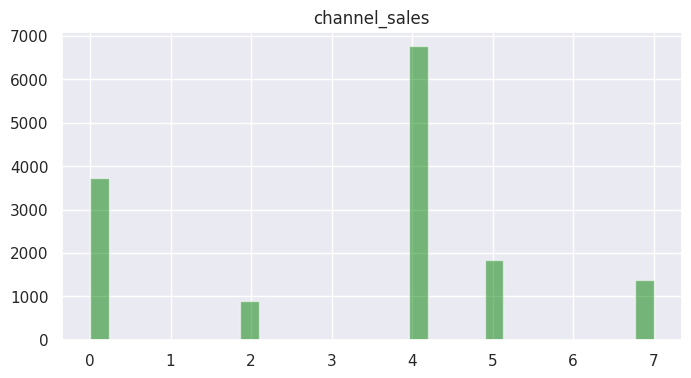

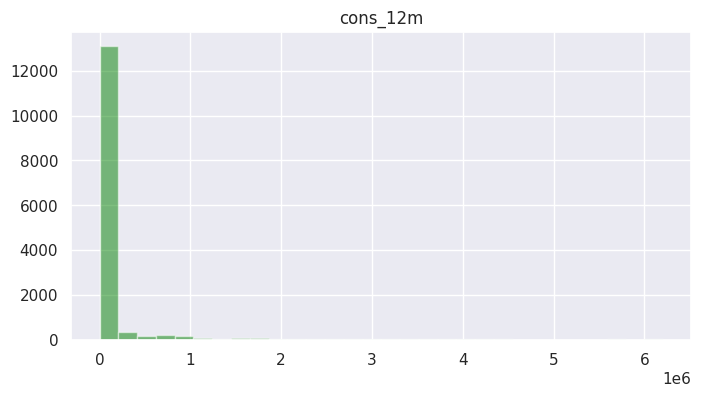

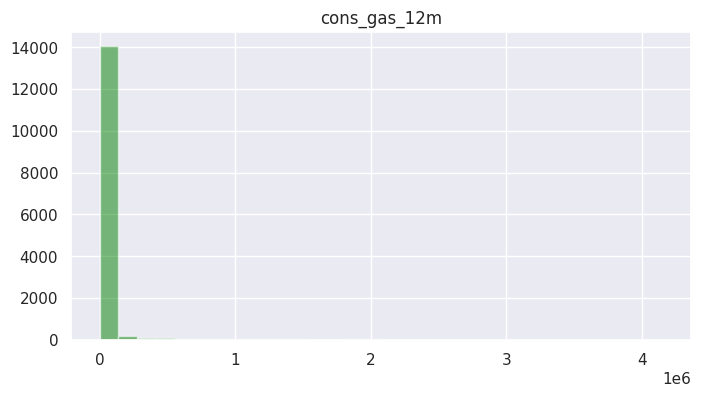

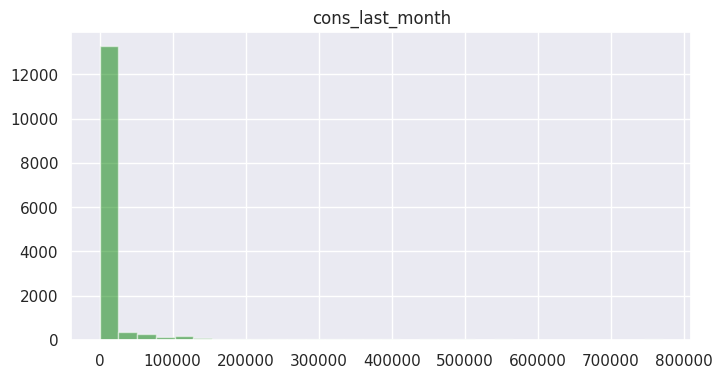

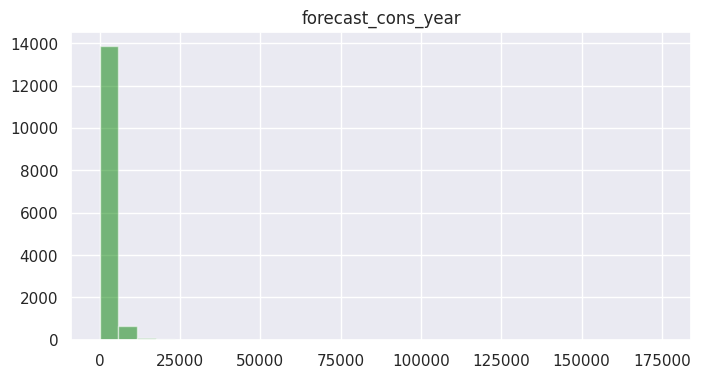

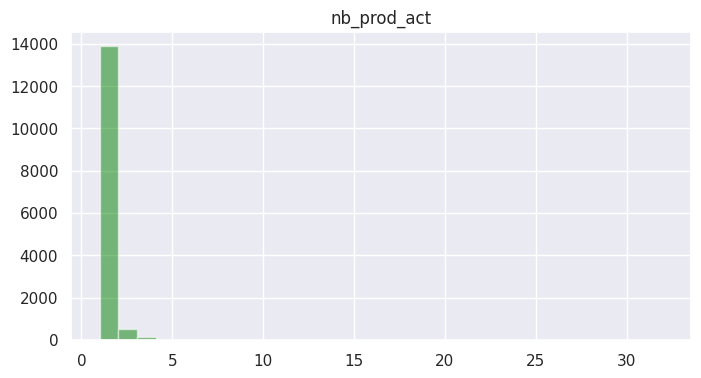

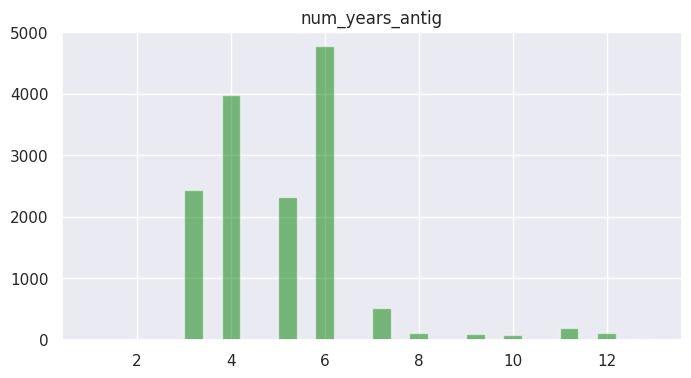

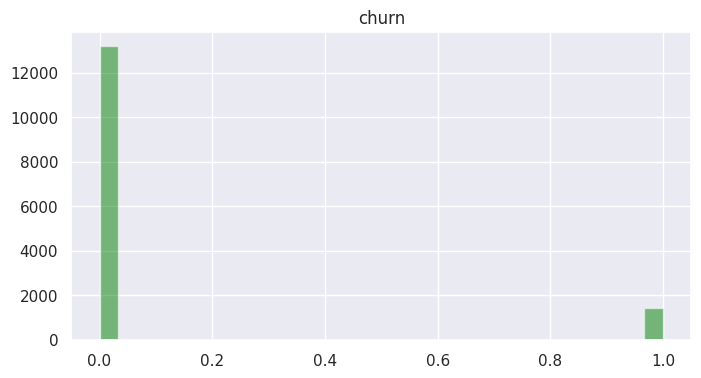

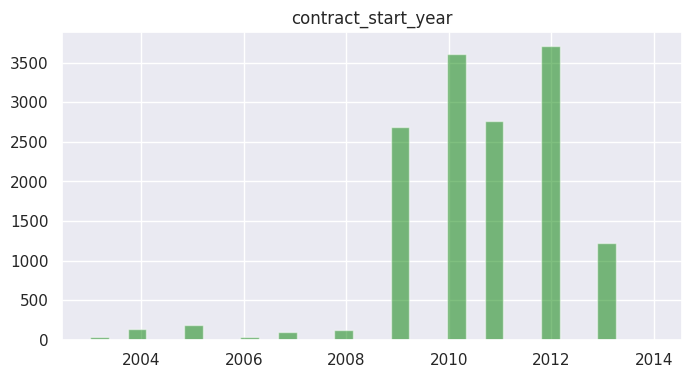

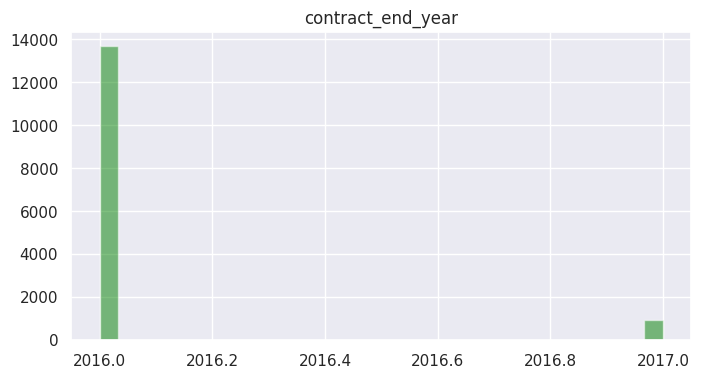

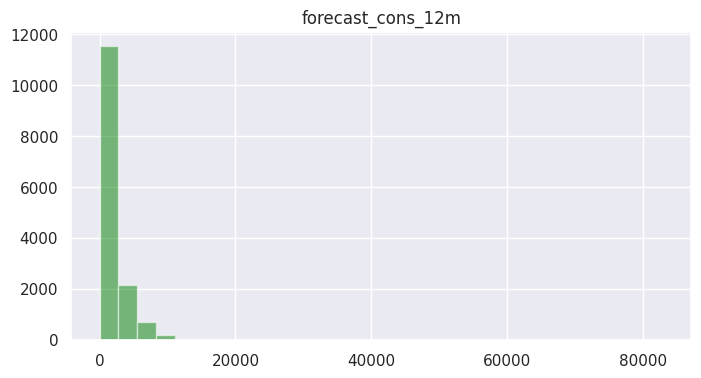

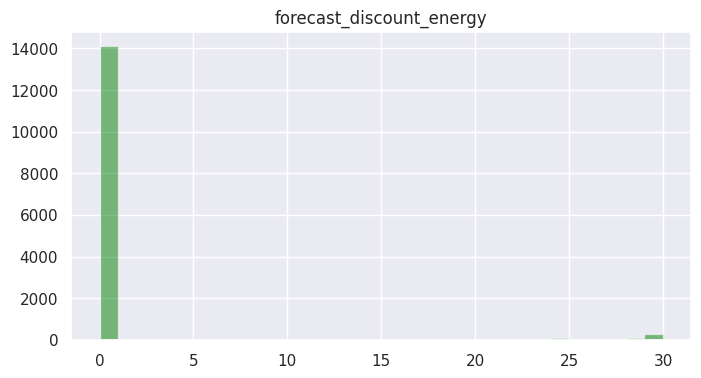

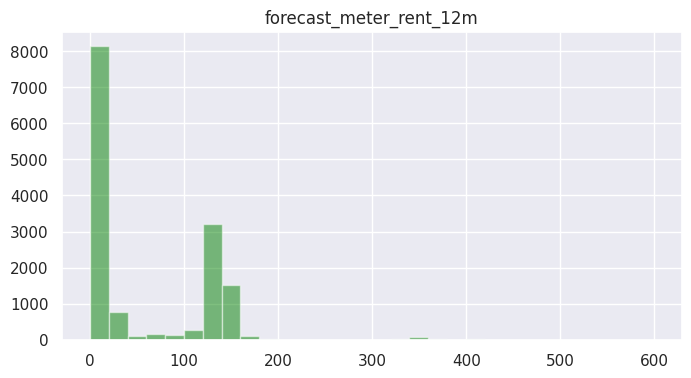

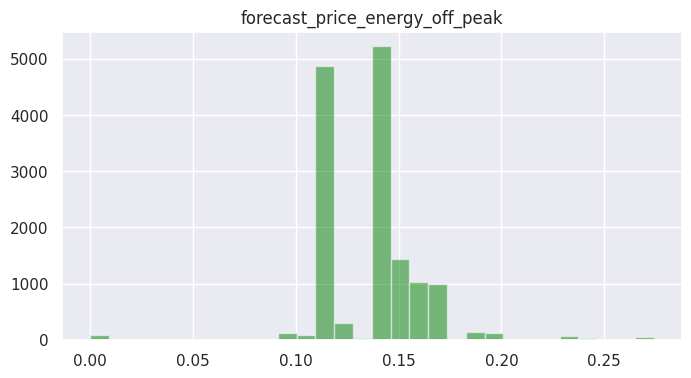

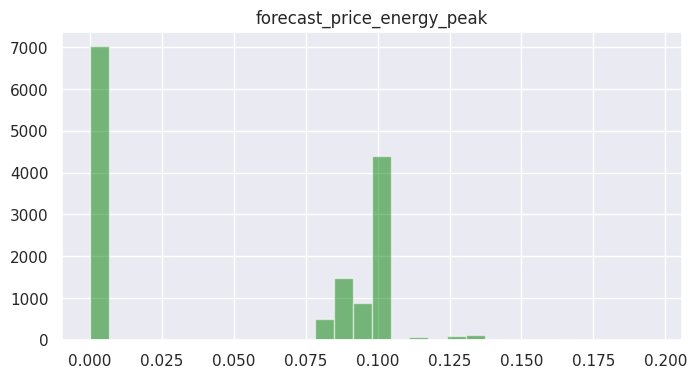

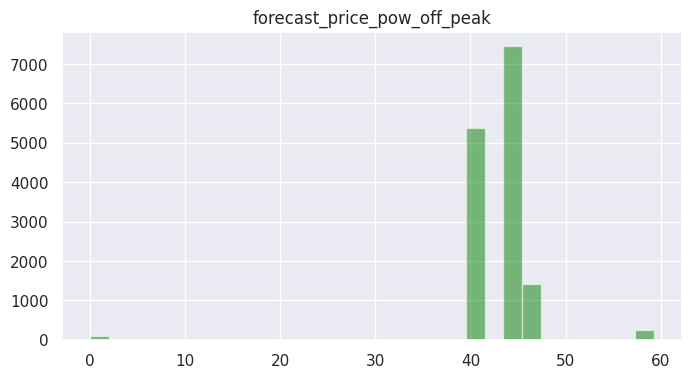

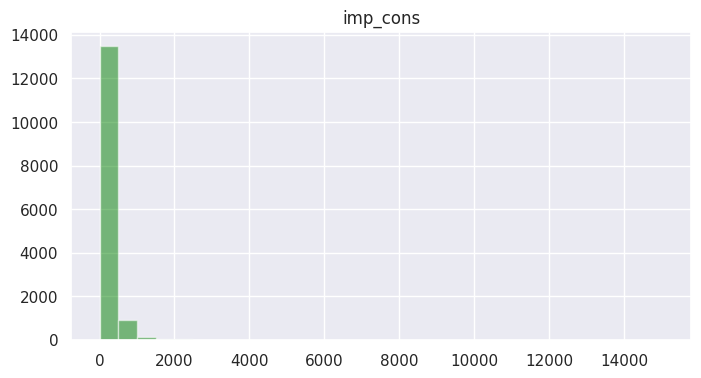

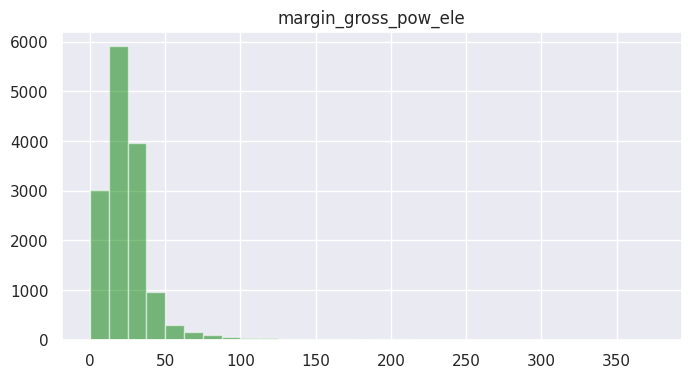

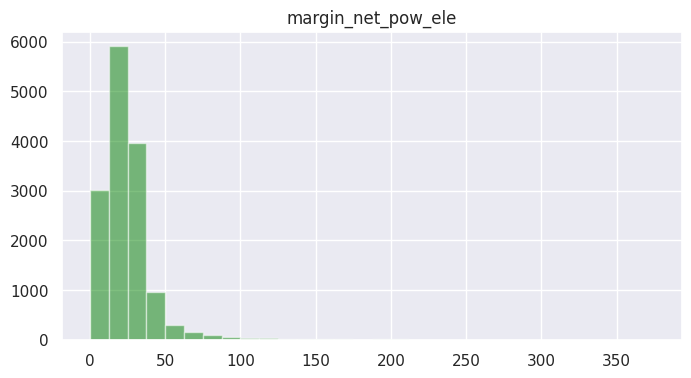

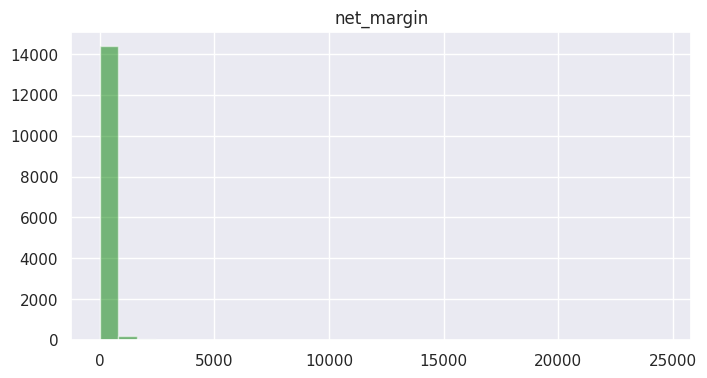

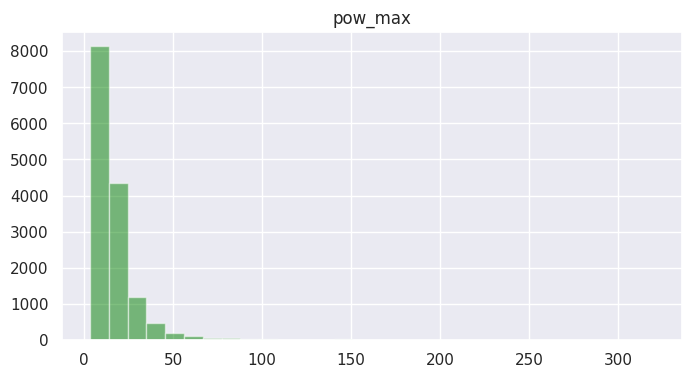

In [315]:
for column in client_numerical_columns:
    plt.figure(figsize=(8, 4))
    client_data[column].hist(alpha=0.5, color='green', bins=30)
    plt.title(column)
    plt.show()

# **Plotting Histograms of Numerical Columns by Churn Status in Client Data**

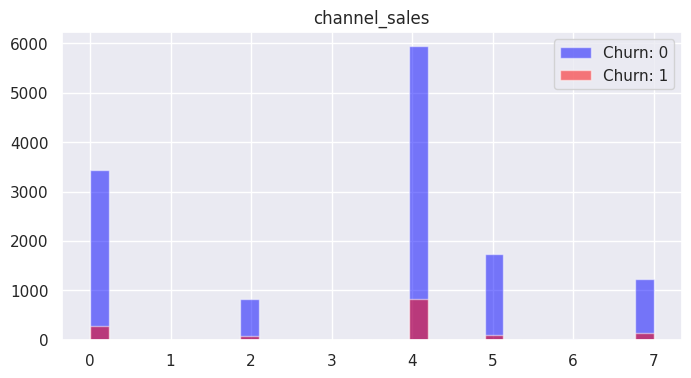

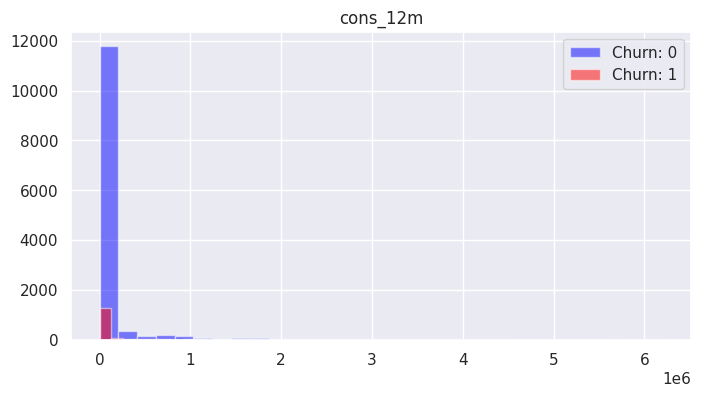

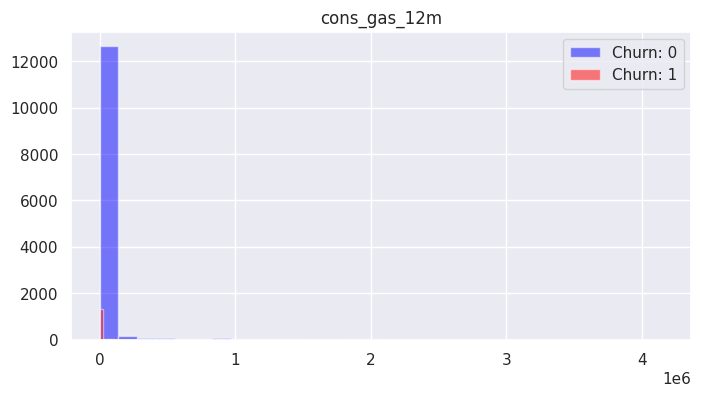

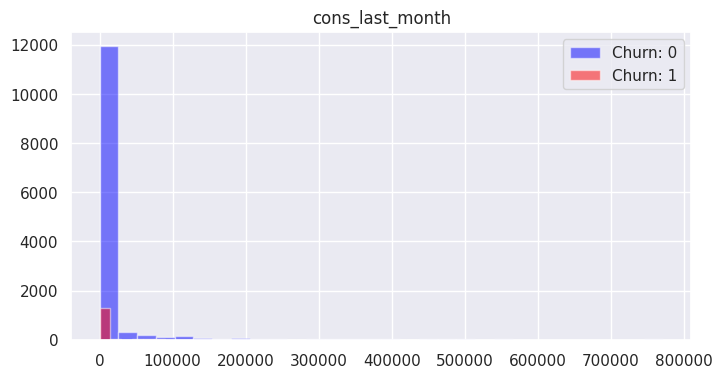

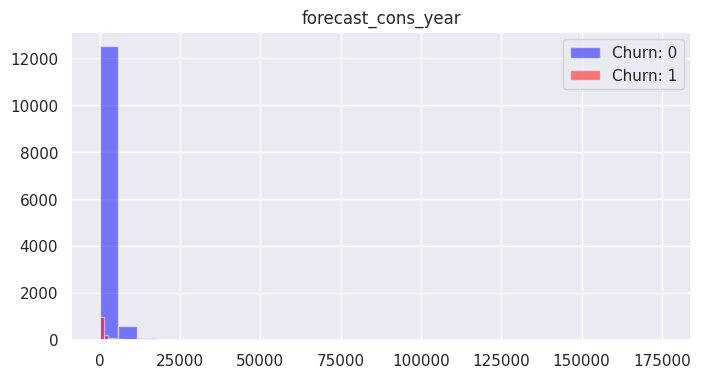

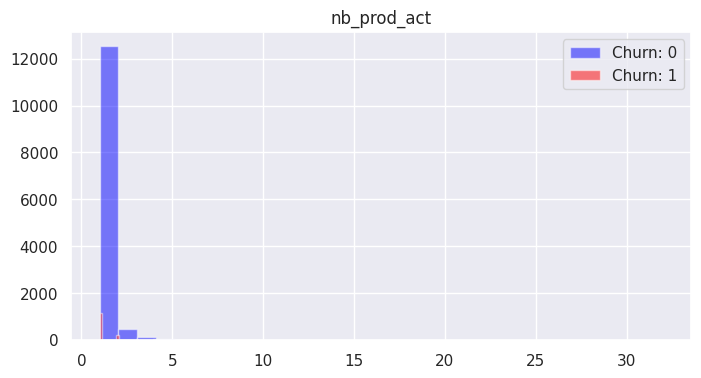

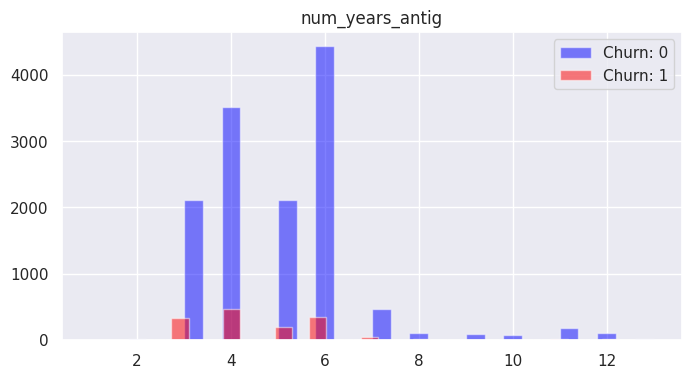

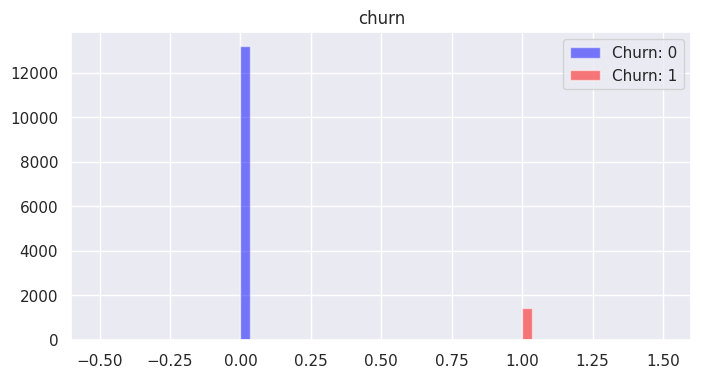

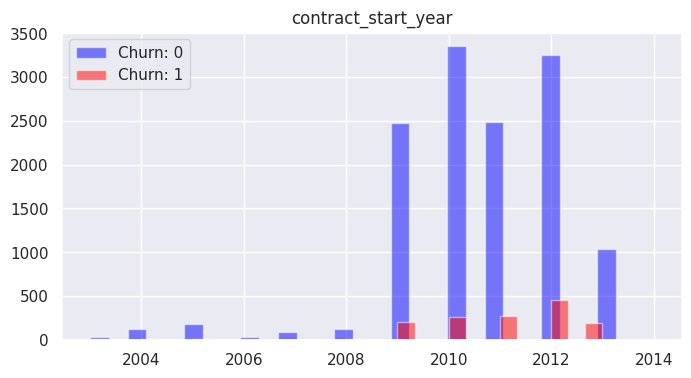

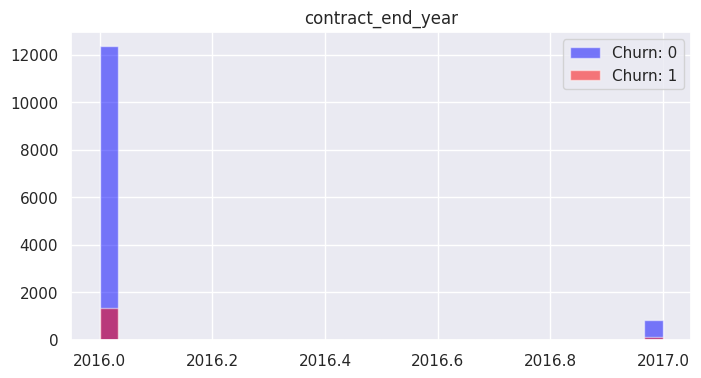

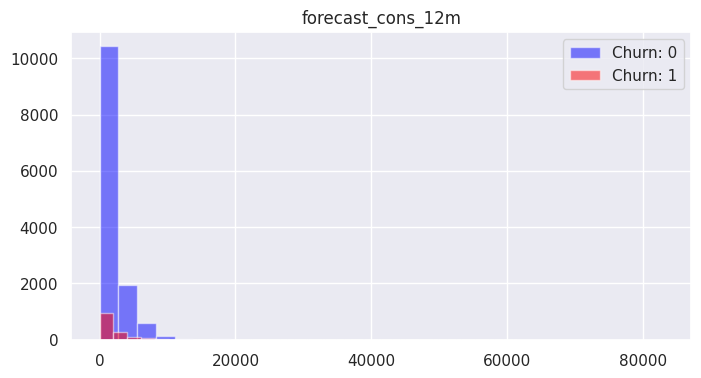

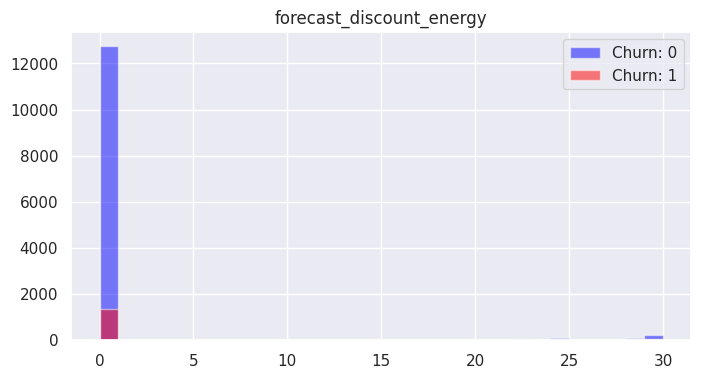

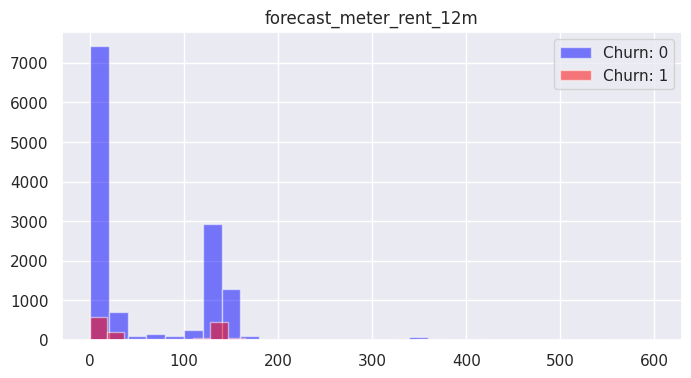

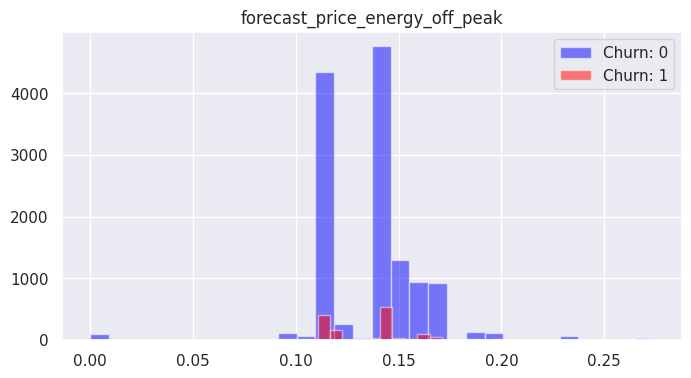

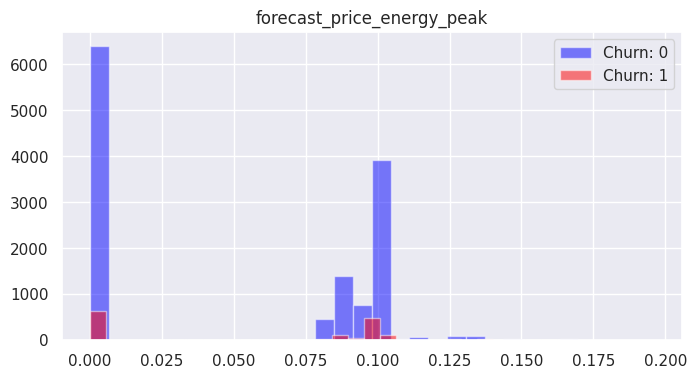

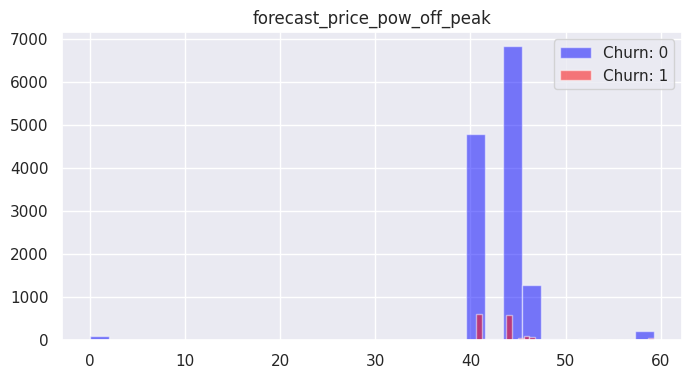

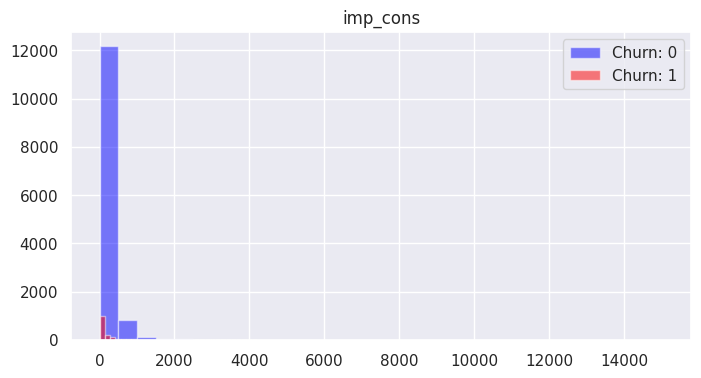

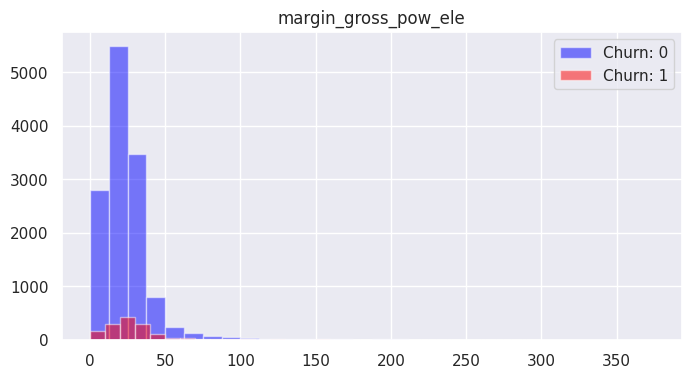

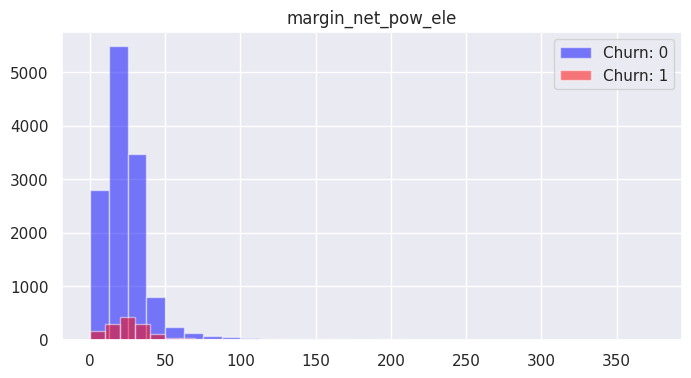

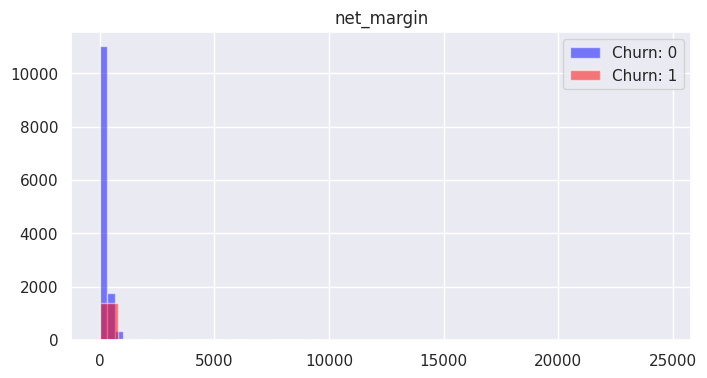

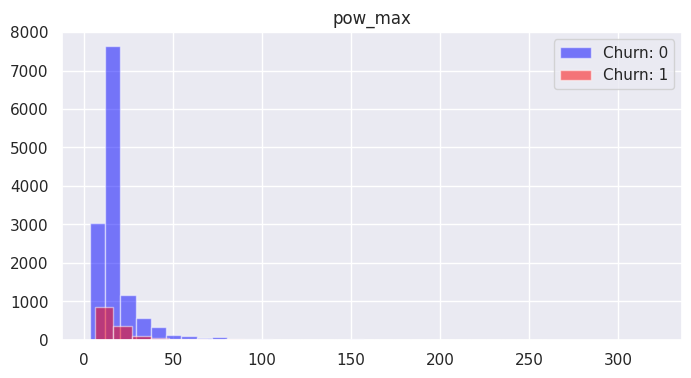

In [316]:
for column in client_numerical_columns:
    plt.figure(figsize=(8, 4))
    client_data[client_data['churn'] == 0][column].hist(alpha=0.5, color='blue', bins=30, label='Churn: 0')
    client_data[client_data['churn'] == 1][column].hist(alpha=0.5, color='red', bins=30, label='Churn: 1')
    plt.title(column)
    plt.legend()
    plt.show()

# **Count Plot of Gas Availability in Client Data**

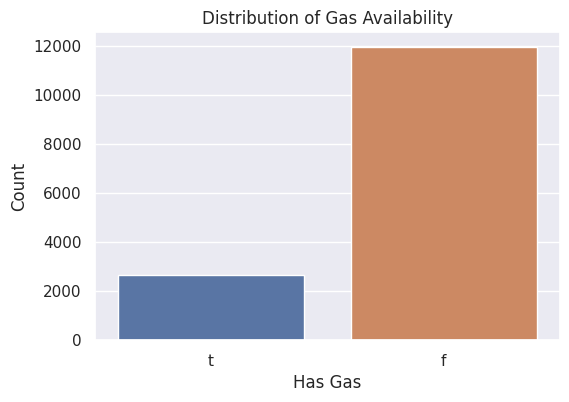

In [317]:
plt.figure(figsize=(6, 4))
sns.countplot(x='has_gas', data=client_data)
plt.title('Distribution of Gas Availability')
plt.xlabel('Has Gas')
plt.ylabel('Count')
plt.show()

# **Count Plot of Gas Availability vs. Churn Status in Client Data**

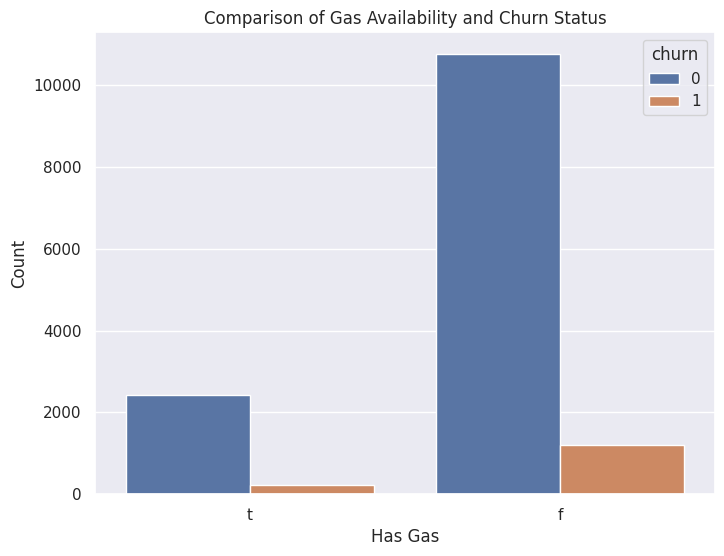

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='has_gas', hue='churn', data=client_data)
plt.title('Comparison of Gas Availability and Churn Status')
plt.xlabel('Has Gas')
plt.ylabel('Count')
plt.show()


# "In the count plot above, it is evident that customers who are not using gas have a higher churn rate compared to those who are using gas."

# **Selecting Numerical Columns From Price Data**

In [319]:
price_numerical_columns = ['price_off_peak_var',
                           'price_peak_var',
                           'price_mid_peak_var',
                           'price_off_peak_fix',
                           'price_peak_fix',
                           'price_mid_peak_fix',
                          'price_date']

# **Exploratory Data Analysis For Price Dataset**

# **Generating Histograms for Each Numerical Column in Price Data**

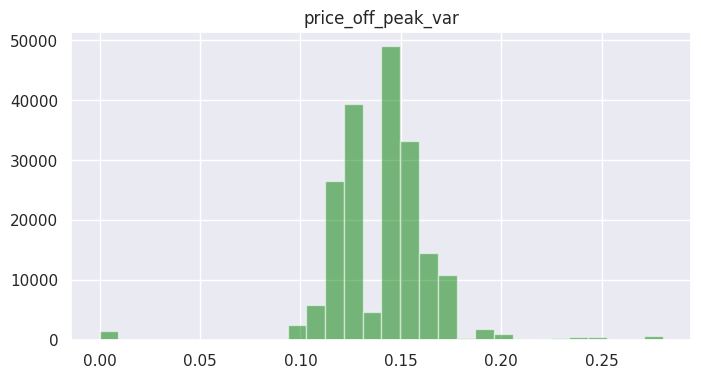

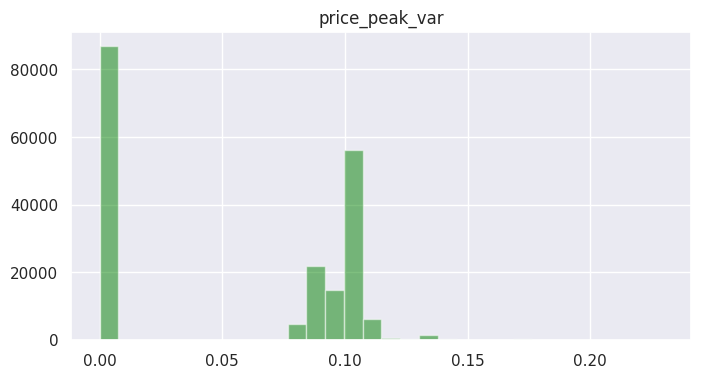

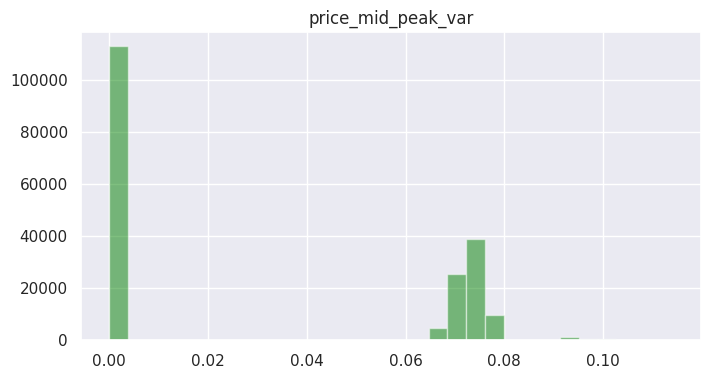

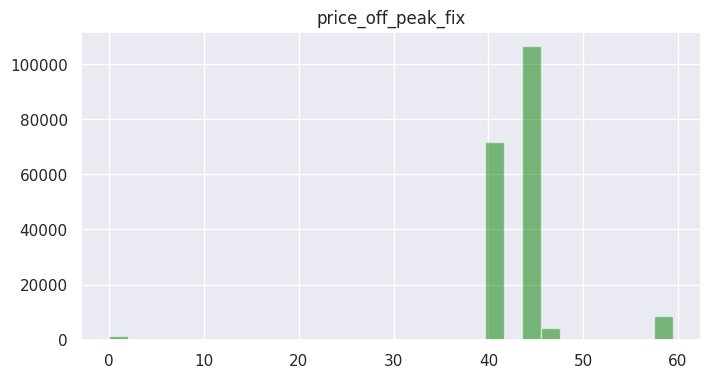

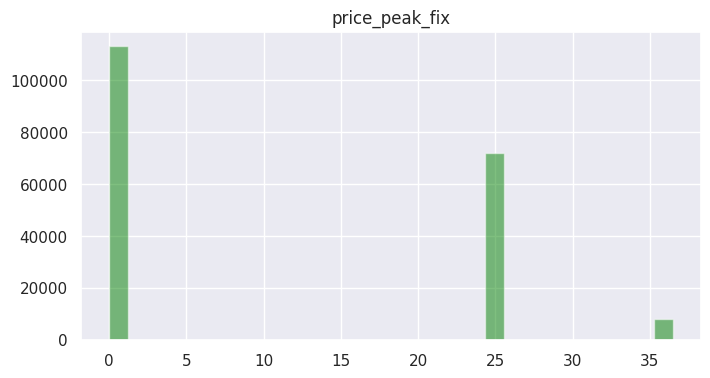

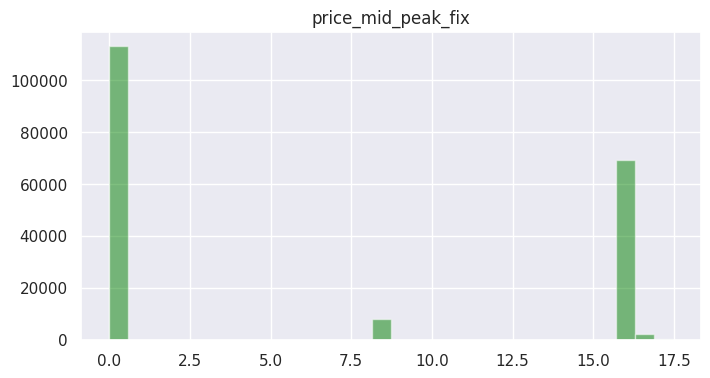

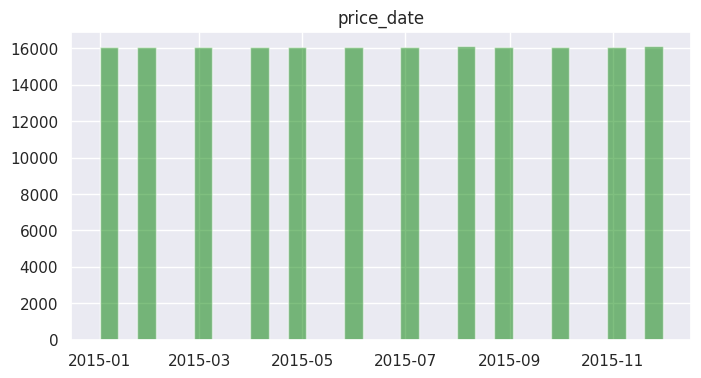

In [320]:
for column in price_numerical_columns:
    plt.figure(figsize=(8, 4))
    price_data[column].hist(alpha=0.5, color='green', bins=30)
    plt.title(column)
    plt.show()

# **Reducing Client Data and Merging with Price Data on ID**

In [321]:
reduced_client_data = client_data[['id', 'churn']]
merged_data = pd.merge(reduced_client_data, price_data, on='id')
merged_data.head(5)


,id,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [322]:
print(merged_data.columns)

Index(['id', 'churn', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')


# **Plotting Histograms of Numerical Columns by Churn Status in Price Data**

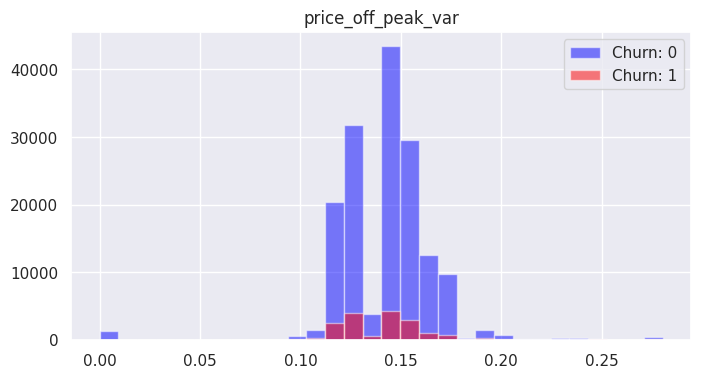

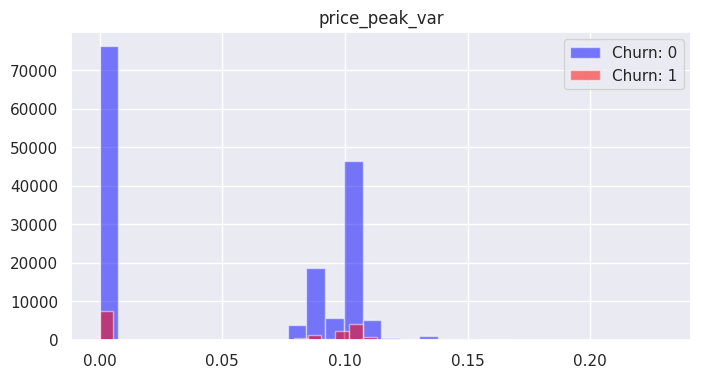

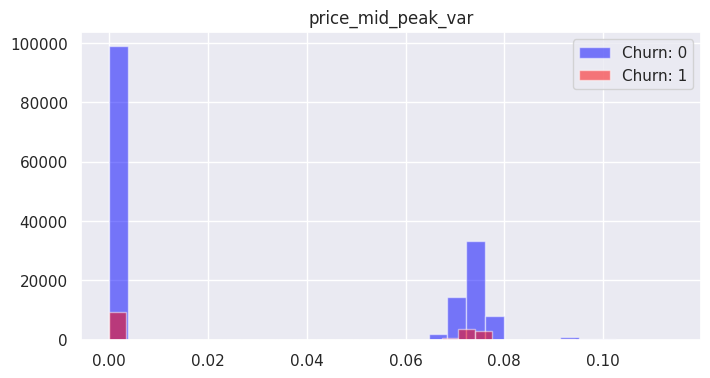

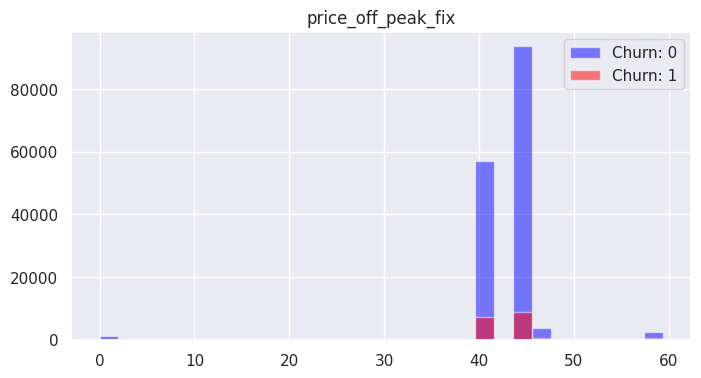

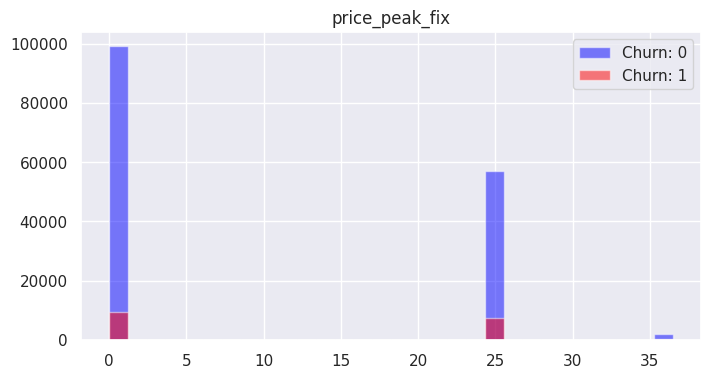

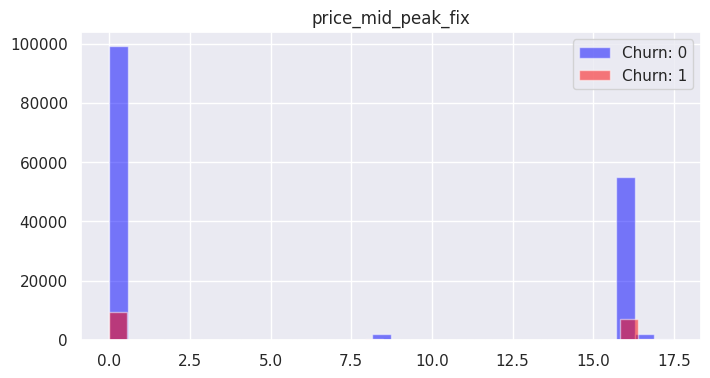

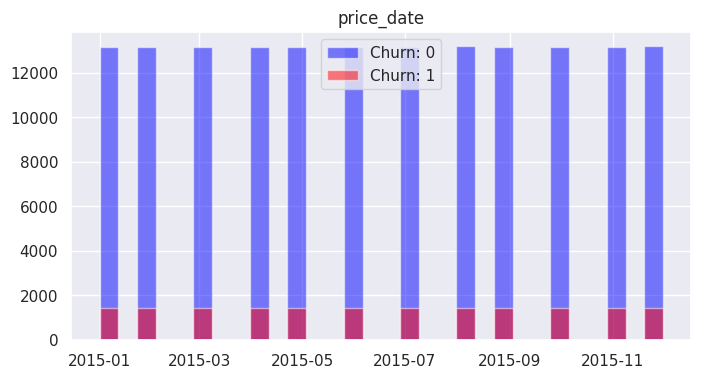

In [323]:
for column in price_numerical_columns:
    plt.figure(figsize=(8, 4))
    merged_data[merged_data['churn'] == 0][column].hist(alpha=0.5, color='blue', bins=30, label='Churn: 0')
    merged_data[merged_data['churn'] == 1][column].hist(alpha=0.5, color='red', bins=30, label='Churn: 1')
    plt.title(column)
    plt.legend()
    plt.show()